# Signature Project
Project Objective: To demonstrate your ability with Machine Learning Regression based on classroom learning. 


Project Case: Prediction of news article popularity based on article attributes. 


In [35]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:

df = pd.read_csv('OnlineNewsPopularity.csv')

In [37]:
df.shape

(39644, 61)

In [38]:
## Pandas Setup Visuals
pd.set_option('display.max_columns', None)


In [39]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [40]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

The output above shows apart from the first column 'url' which is an object, all of the other features are of the datatype float/int.
This means that the categorical variables were already encoded before making this dataset available. Now, furtehr we will have to check which among the 61 features are categorical in nature.  
The following can be done with by visualising our data, finding out unique values of features and some knowledge of subject matter. 


In [42]:
df[' shares'].unique()

array([  593,   711,  1500, ..., 34500, 25600, 45000], dtype=int64)

In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.nunique()

url                               39644
 timedelta                          724
 n_tokens_title                      20
 n_tokens_content                  2406
 n_unique_tokens                  27281
 n_non_stop_words                  1451
 n_non_stop_unique_tokens         22930
 num_hrefs                          133
 num_self_hrefs                      59
 num_imgs                            91
 num_videos                          53
 average_token_length             30136
 num_keywords                        10
 data_channel_is_lifestyle            2
 data_channel_is_entertainment        2
 data_channel_is_bus                  2
 data_channel_is_socmed               2
 data_channel_is_tech                 2
 data_channel_is_world                2
 kw_min_min                          26
 kw_max_min                        1076
 kw_avg_min                       17003
 kw_min_max                        1021
 kw_max_max                          35
 kw_avg_max                       30834


After displaying all the unique values, of each feature in our dataset it can be seen that out of all the varying values, the features having only two unique values can be considered as categorical data. Hence, these variables can be considered as categorical varibles and the rest of our dataset to be considered numerical.

# Data Issues

In [45]:
df.isnull().sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

This implies that there are no null values in our dataset and hence we need not handle them

---------------------------------------------------------------------------------------------

Since, the url holds no significance with respect to the number of shares, it a column which will be dropped. This is because the popluarity measure,i.e., Shares does not depend on the fact of our link is structured and also because shares is a numerical data but url is an object datatype a.k.a string but rather on the basis of the content and other factors which will be found out. 

In [46]:
df.drop(['url'],axis=1,inplace=True)

In [47]:
df.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,0.130465,0.046884,0.054492,-0.049109,0.055788,0.076287,0.083277,-0.170250,0.591199,0.029503,0.133225,-0.076590,-0.637824,-0.493093,-0.157204,-0.051820,-0.163164,-0.011438,-0.014501,-0.015655,-0.006129,-0.005781,0.009961,0.004042,-0.002853,-0.004067,0.004226,0.000272,0.080894,0.004423,-0.141713,-0.030838,0.092906,0.133837,0.158646,0.207604,0.010266,0.198654,-0.071968,0.126344,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,-0.006077,-0.070815,0.132791,-0.023902,-0.090394,-0.046716,0.049223,-0.110672,-0.005890,-0.031400,0.012926,0.120841,0.115746,-0.002370,0.006918,0.004296,-0.004563,0.000128,0.000661,0.004274,0.009322,0.008935,-0.015472,-0.002015,-0.015013,0.006289,-0.005996,-0.070038,0.063568,0.038365,0.042208,-0.065063,-0.056804,-0.072226,-0.064951,0.015530,-0.066589,0.034186,-0.049619,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,0.072845,0.037548,0.060200,-0.006105,0.033424,0.025408,0.055989,-0.054345,0.000066,-0.003545,-0.022786,0.058860,-0.096460,-0.022286,-0.030496,-0.079624,-0.030686,0.025657,-0.013809,-0.002484,-0.004027,-0.016891,-0.007395,-0.015949,0.034538,0.036394,0.052024,0.026218,-0.009724,0.087266,-0.140141,0.041265,0.127879,0.021937,0.133979,0.125013,0.098960,0.101053,0.135123,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,-0.003679,-0.001653,0.011016,-0.000264,-0.000945,-0.002328,-0.005535,0.001601,-0.000552,-0.000826,0.000577,-0.001624,0.000805,0.004563,-0.002120,-0.002083,0.001036,-0.000222,0.001992,-0.002142,0.010538,-0.002224,-0.002248,-0.001398,-0.002563,-0.001803,-0.003186,-0.002213,-0.000827,-0.006855,-0.003689,-0.004260,-0.000180,0.000523,0.000014,-0.000877,-0.000667,-0.001657,-0.000487,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,-0.001439,-0.000314,0.010903,-0.000012,-0.000078,0.000061,-0.002702,-0.000352,-0.000595,-0.000892,-0.000553,0.000394,-0.002939,0.003284,-0.003408,-0.005415,0.000339,0.000170,0.001614,-0.002147,0.010501,-0.002517,-0.002360,-0.001963,-0.001508,-0.001338,-0.002082,-0.001031,-0.002869,-0.003286,-0.009761,-0.001072,0.002565,0.000831,0.001535,0.001036,0.002421,0.001245,0.002285,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_uniqu

In [48]:
df.duplicated().sum()

0

Hence we have no duplication of any values in our dataset


# EDA


In [49]:
df[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [50]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

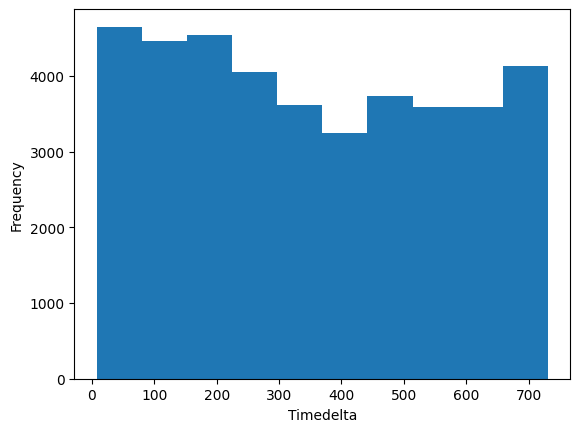

In [51]:
plt.hist(df[' timedelta'], bins=10)
plt.xlabel('Timedelta')
plt.ylabel('Frequency')
plt.show()

As defined in the description of the dataset, timedelta is the Days between the article publication and the dataset acquisition. hence it is irrelevant to our study about news popularity. Hence, it will be dropped.

In [52]:
df.drop([' timedelta'],axis=1,inplace=True)

While analysing this dataset as per our problem statement, one major question comes to mind.What features affact our target variable shares? This can be analysed through various visualisations as seen below:

In [53]:
cm=df.corr()
cm

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,-0.006077,-0.070815,0.132791,-0.023902,-0.090394,-0.046716,0.049223,-0.110672,-0.005890,-0.031400,0.012926,0.120841,0.115746,-0.002370,0.006918,0.004296,-0.004563,0.000128,0.000661,0.004274,0.009322,0.008935,-0.015472,-0.002015,-0.015013,0.006289,-0.005996,-0.070038,0.063568,0.038365,0.042208,-0.065063,-0.056804,-0.072226,-0.064951,0.015530,-0.066589,0.034186,-0.049619,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,0.072845,0.037548,0.060200,-0.006105,0.033424,0.025408,0.055989,-0.054345,0.000066,-0.003545,-0.022786,0.058860,-0.096460,-0.022286,-0.030496,-0.079624,-0.030686,0.025657,-0.013809,-0.002484,-0.004027,-0.016891,-0.007395,-0.015949,0.034538,0.036394,0.052024,0.026218,-0.009724,0.087266,-0.140141,0.041265,0.127879,0.021937,0.133979,0.125013,0.098960,0.101053,0.135123,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,-0.003679,-0.001653,0.011016,-0.000264,-0.000945,-0.002328,-0.005535,0.001601,-0.000552,-0.000826,0.000577,-0.001624,0.000805,0.004563,-0.002120,-0.002083,0.001036,-0.000222,0.001992,-0.002142,0.010538,-0.002224,-0.002248,-0.001398,-0.002563,-0.001803,-0.003186,-0.002213,-0.000827,-0.006855,-0.003689,-0.004260,-0.000180,0.000523,0.000014,-0.000877,-0.000667,-0.001657,-0.000487,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,-0.001439,-0.000314,0.010903,-0.000012,-0.000078,0.000061,-0.002702,-0.000352,-0.000595,-0.000892,-0.000553,0.000394,-0.002939,0.003284,-0.003408,-0.005415,0.000339,0.000170,0.001614,-0.002147,0.010501,-0.002517,-0.002360,-0.001963,-0.001508,-0.001338,-0.002082,-0.001031,-0.002869,-0.003286,-0.009761,-0.001072,0.002565,0.000831,0.001535,0.001036,0.002421,0.001245,0.002285,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,-0.004440,-0.000417,0.010554,0.001840,-0.000526,-0.000921,-0.003801,0.002001,-0.000615,-0.000644,-0.000089,-0.002032,-0.002006,0.002510,-0.003694,-0.005944,0.000989,-0.000077,0.002009,-0.002042,0.010510,-0.002070,-0.002283,-0.001301,-0.002623,-0.002167,-0.003502,0.000342,-0.000965,-0.004965,-0.009781,-0.002097,0.005498,0.002043,0.005002,0.002590,0.005258,0.001709,0.004671,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.053496,0.423065,-0.004352,0.005521,-0

In [84]:
df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

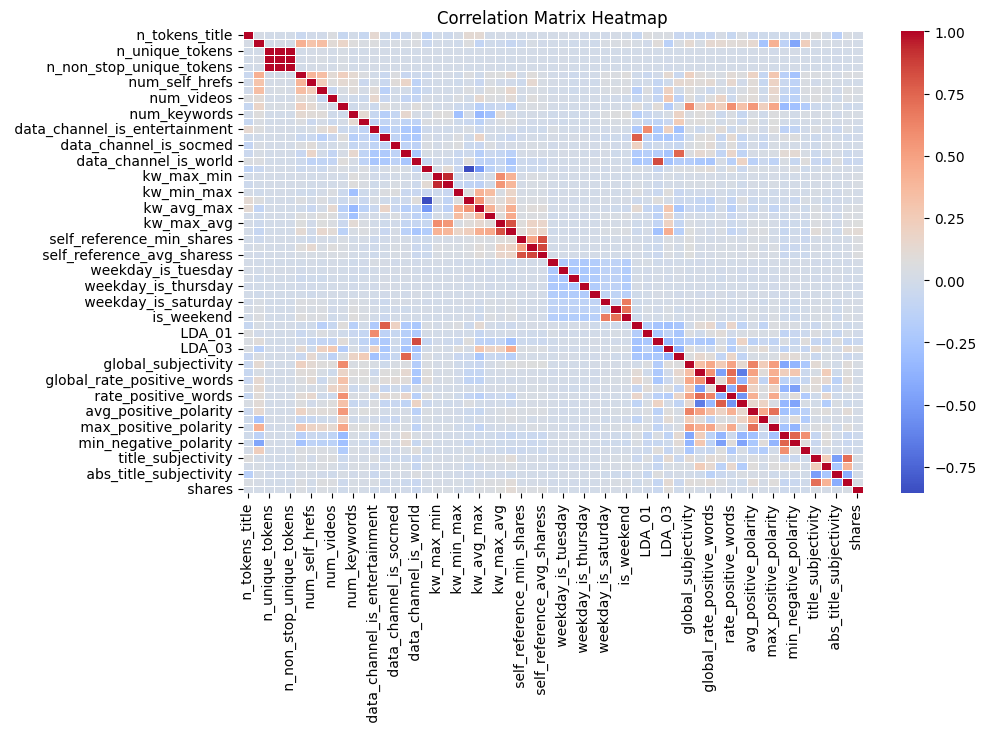

 shares                           1.000000
 kw_avg_avg                       0.110413
 LDA_03                           0.083771
 kw_max_avg                       0.064306
 self_reference_avg_sharess       0.057789
 self_reference_min_shares        0.055958
 self_reference_max_shares        0.047115
 num_hrefs                        0.045404
 kw_avg_max                       0.044686
 kw_min_avg                       0.039551
 num_imgs                         0.039388
 global_subjectivity              0.031604
 kw_avg_min                       0.030406
 kw_max_min                       0.030114
 abs_title_sentiment_polarity     0.027135
 num_videos                       0.023936
 title_subjectivity               0.021967
 num_keywords                     0.021818
 is_weekend                       0.016958
 weekday_is_saturday              0.015082
 title_sentiment_polarity         0.012772
 avg_positive_polarity            0.012142
 max_positive_polarity            0.010068
 weekday_is

0.02691458779706684

In [88]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, cmap='coolwarm', linewidths=0.7)
plt.title("Correlation Matrix Heatmap")
plt.show()

correlation_with_target = df.corr()[' shares'].sort_values(ascending=False)
print(correlation_with_target)

df.corr()[' shares'].mean()


Hence, from this we infer that apart from the strong correlation of variables with themselves, there are issues of multicollinearity, as some variable are strongly correlated with each other, a significant example being n_unique_tokens and n_non_stop_unique_tokens. Apart from this we see an average correlation of 0.27 of our target variable shares with the rest of the features. Hence we will have to look at other techniques for feature selection

In [92]:
df[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

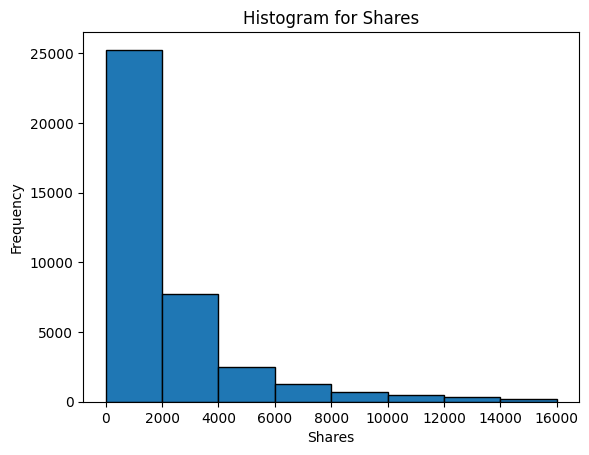

In [127]:
plt.hist(df[' shares'], bins=8,range=(0, 16000) , edgecolor='black')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.title('Histogram for Shares')
plt.show()

Majority of our shares, lie in the range between 0 to approximately equivalent to the upper quartile. only 25% of data is present beyond 75 

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

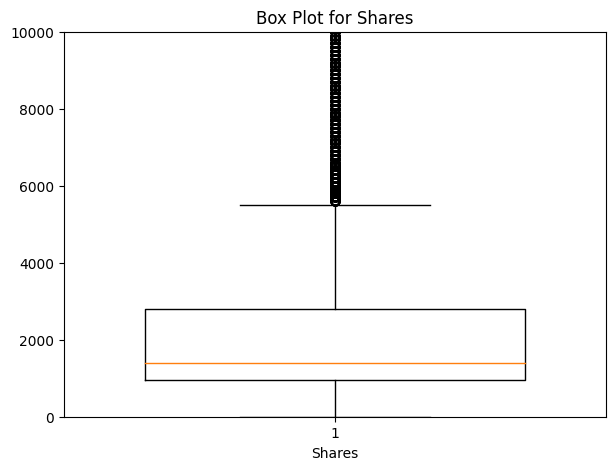

In [194]:
plt.figure(figsize=(7, 5))  # Optional: Set the figure size
plt.boxplot(df[' shares'], vert=True, widths=0.7)
plt.xlabel('Shares')
plt.title('Box Plot for Shares')
plt.ylim(0,10000)
#plt.xlim(0,10000)
plt.show
df[' shares'].describe()

In [193]:

Q1 = df[' shares'].quantile(0.25)
Q3 = df[' shares'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df[' shares'] >= lower_bound) & (df[' shares'] <= upper_bound)]
df_no_outliers[' shares'].describe()



count    35103.000000
mean      1671.972652
std       1103.199563
min          1.000000
25%        903.000000
50%       1300.000000
75%       2100.000000
max       5500.000000
Name:  shares, dtype: float64

In [202]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming you have a DataFrame called 'df' with your data
# For example, df = pd.read_csv('your_data.csv')

# Extract the dependent variable 'shares' and the categorical features
shares = df[' shares']
categorical_features = df[[' data_channel_is_lifestyle', ' data_channel_is_entertainment', 
                           ' data_channel_is_bus', ' data_channel_is_socmed', 
                           ' data_channel_is_tech', ' data_channel_is_world', 
                           ' weekday_is_monday', ' weekday_is_tuesday', 
                           ' weekday_is_wednesday', ' weekday_is_thursday', 
                           ' weekday_is_friday', ' weekday_is_saturday', 
                           ' weekday_is_sunday', ' is_weekend']]

# Perform one-way ANOVA for each categorical feature
anova_results = []

for column in categorical_features.columns:
    unique_categories = categorical_features[column].unique()
    group_data = [shares[categorical_features[column] == category] for category in unique_categories if not pd.isnull(category)]
    
    if len(group_data) > 1:
        f_statistic, p_value = f_oneway(*group_data)
        
    else:
        f_statistic, p_value = 0, 1  # If only one group, set p-value to 1 (no significant difference)
    
    anova_results.append({'Feature': column, 'F-Statistic': f_statistic, 'P-Value': p_value})

# Create a DataFrame to display the ANOVA results
anova_df = pd.DataFrame(anova_results)

# Display the results
print(anova_df)



                           Feature  F-Statistic       P-Value
0        data_channel_is_lifestyle     1.348020  2.456316e-01
1    data_channel_is_entertainment    11.468211  7.086554e-04
2              data_channel_is_bus     6.072875  1.373154e-02
3           data_channel_is_socmed     0.999504  3.174368e-01
4             data_channel_is_tech     6.963892  8.320345e-03
5            data_channel_is_world    97.360782  6.140743e-23
6                weekday_is_monday     3.750628  5.279476e-02
7               weekday_is_tuesday     2.499742  1.138729e-01
8             weekday_is_wednesday     0.572641  4.492158e-01
9              weekday_is_thursday     3.093356  7.862025e-02
10               weekday_is_friday     0.598134  4.392953e-01
11             weekday_is_saturday     9.019586  2.672685e-03
12               weekday_is_sunday     2.684948  1.013084e-01
13                      is_weekend    11.403528  7.337519e-04
